# KLASIFIKASI CNN MNIST 

In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D

import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


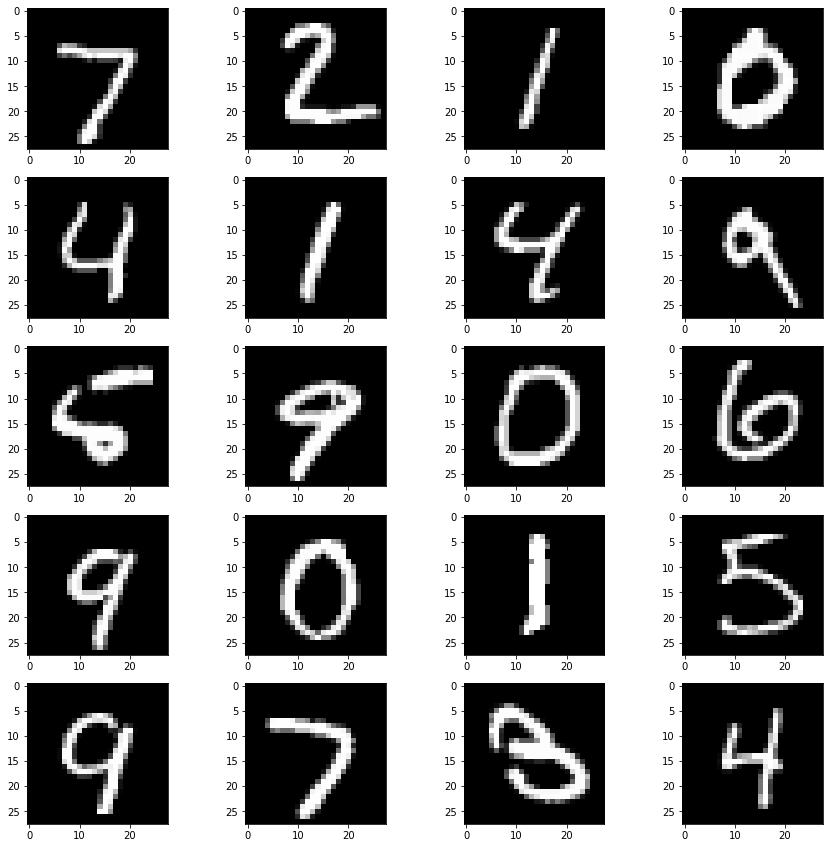

In [3]:
plt.figure(figsize=(15, 15))
for i in range(20):
    plt.subplot(5, 4, i + 1)
    plt.imshow(x_test[i], cmap=plt.get_cmap('gray'))

plt.show()

In [4]:
num_classes = 10
input_shape = (28, 28, 1)

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print(x_train.shape)

(60000, 28, 28)


In [5]:
# Make sure images have shape (28, 28, 1)
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],x_train.shape[2],1))

print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Model

In [7]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),        
        layers.Flatten(),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                184330    
Total params: 189,130
Trainable params: 189,130
Non-trainable params: 0
_________________________________________________________________


### Training

In [8]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)

Epoch 1/15
375/375 [==============================] - 15s 39ms/step - loss: 0.2634 - accuracy: 0.9242 - val_loss: 0.0785 - val_accuracy: 0.9788
Epoch 2/15
375/375 [==============================] - 14s 38ms/step - loss: 0.0664 - accuracy: 0.9798 - val_loss: 0.0681 - val_accuracy: 0.9799
Epoch 3/15
375/375 [==============================] - 14s 37ms/step - loss: 0.0462 - accuracy: 0.9859 - val_loss: 0.0581 - val_accuracy: 0.9836
Epoch 4/15
375/375 [==============================] - 14s 37ms/step - loss: 0.0343 - accuracy: 0.9891 - val_loss: 0.0636 - val_accuracy: 0.9818
Epoch 5/15
375/375 [==============================] - 14s 37ms/step - loss: 0.0246 - accuracy: 0.9922 - val_loss: 0.0535 - val_accuracy: 0.9838
Epoch 6/15
375/375 [==============================] - 14s 37ms/step - loss: 0.0200 - accuracy: 0.9940 - val_loss: 0.0570 - val_accuracy: 0.9844
Epoch 7/15
375/375 [==============================] - 14s 37ms/step - loss: 0.0142 - accuracy: 0.9960 - val_loss: 0.0578 - val_accuracy:

### Evaluasi

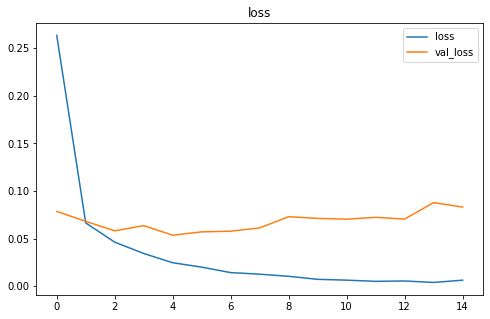

In [9]:
plt.figure(figsize=(8,5))
plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.title('loss')
plt.legend(['loss', 'val_loss'])

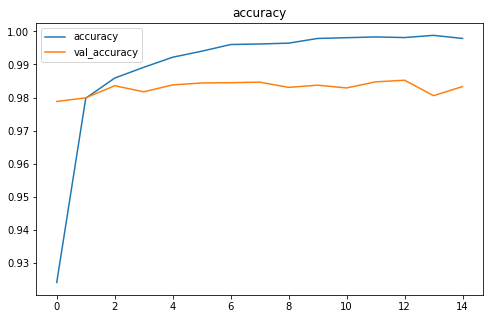

In [10]:
plt.figure(figsize=(8,5))
plt.plot(history.epoch,history.history['accuracy'])
plt.plot(history.epoch,history.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['accuracy', 'val_accuracy'])

In [11]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.06531348079442978
Test accuracy: 0.9857000112533569


In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

predictions = model.predict(x_test)

predictions = np.argmax(predictions, axis=1)
y_test = np.argmax(y_test, axis=1)

print('Confusion Matriks:')
print(confusion_matrix(y_test, predictions))
print()

print('Rlassification Report:')
print(classification_report(y_test, predictions, digits=4))

Confusion Matriks:
[[ 974    0    2    1    0    0    2    0    1    0]
 [   0 1127    1    1    1    1    2    1    1    0]
 [   1    3 1022    0    1    0    0    4    1    0]
 [   0    0    4  994    0    9    0    1    1    1]
 [   0    1    0    0  973    0    3    0    0    5]
 [   2    0    1    6    0  879    3    1    0    0]
 [   6    2    0    1    2    6  938    0    3    0]
 [   0    2   10    3    1    0    0 1006    2    4]
 [   3    0    2    0    0    0    5    2  958    4]
 [   3    3    0    0    9    4    0    2    2  986]]

Rlassification Report:
              precision    recall  f1-score   support

           0     0.9848    0.9939    0.9893       980
           1     0.9903    0.9930    0.9916      1135
           2     0.9808    0.9903    0.9855      1032
           3     0.9881    0.9842    0.9861      1010
           4     0.9858    0.9908    0.9883       982
           5     0.9778    0.9854    0.9816       892
           6     0.9843    0.9791    0.9817    

### Inference

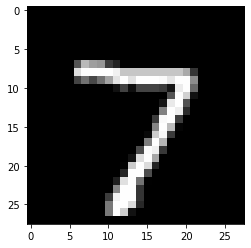

In [13]:
plt.figure(figsize=(4, 4))
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))
plt.show()

In [14]:
img = x_test[0].reshape(-1, 28, 28, 1)

predict_x = model.predict(img) 
classes_x = np.argmax(predict_x,axis=1)
print(classes_x)

[7]


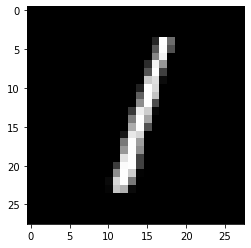

In [15]:
plt.figure(figsize=(4, 4))
plt.imshow(x_test[2], cmap=plt.get_cmap('gray'))
plt.show()

In [16]:
img = x_test[2].reshape(-1, 28, 28, 1)

predict_x = model.predict(img) 
classes_x = np.argmax(predict_x,axis=1)
print(classes_x)

[1]
